In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# OB ATAC-seq data

In [9]:
OB_atac = pd.read_csv('/mnt/10T-backup-mingju/ifar/ATAC_seq/hMSC/hMSC_Day15/atac_pipeline_results/idr.optimal_peak.narrowPeak_w_header.bed',sep='\t')

In [10]:
OB_atac

,Chr,Start,End,name,score,strand,signalValue,pValue,qValue,peak
0,chr17,22521174,22521670,.,1000,.,33.87889,4586.68848,4578.77734,443
1,chr17,22521174,22521670,.,1000,.,32.52792,4342.99219,4335.18262,51
2,chr17,22521174,22521670,.,1000,.,28.01845,3521.63037,3514.02026,383
3,chr1,629089,630012,.,1000,.,7.11375,2651.48804,2644.27124,749
4,chr1,629089,630012,.,1000,.,6.84056,2452.44165,2445.36890,593
...,...,...,...,...,...,...,...,...,...,...
220818,chr2,98757568,98758658,.,1000,.,3.79591,11.18936,9.23750,397
220819,chr12,106902963,106903961,.,1000,.,3.79591,11.18936,9.23750,198
220820,chr10,73836876,73837908,.,701,.,3.79591,11.18936,9.23750,141
220821,chr1,234486873,234487822,.,1000,.,3.79591,11.18936,9.23750,902


In [11]:
OB_atac['index'] = OB_atac['Chr'] + ":" + OB_atac['Start'].astype(str) + "-" + OB_atac['End'].astype(str)

In [12]:
OB_atac['ATAC_OB'] = "ATAC-seq:" + OB_atac['Chr'] + ":" + OB_atac['Start'].astype(str) + "-" + OB_atac['End'].astype(str)

In [13]:
OB_atac

,Chr,Start,End,name,score,strand,signalValue,pValue,qValue,peak,index,ATAC_OB
0,chr17,22521174,22521670,.,1000,.,33.87889,4586.68848,4578.77734,443,chr17:22521174-22521670,ATAC-seq:chr17:22521174-22521670
1,chr17,22521174,22521670,.,1000,.,32.52792,4342.99219,4335.18262,51,chr17:22521174-22521670,ATAC-seq:chr17:22521174-22521670
2,chr17,22521174,22521670,.,1000,.,28.01845,3521.63037,3514.02026,383,chr17:22521174-22521670,ATAC-seq:chr17:22521174-22521670
3,chr1,629089,630012,.,1000,.,7.11375,2651.48804,2644.27124,749,chr1:629089-630012,ATAC-seq:chr1:629089-630012
4,chr1,629089,630012,.,1000,.,6.84056,2452.44165,2445.36890,593,chr1:629089-630012,ATAC-seq:chr1:629089-630012
...,...,...,...,...,...,...,...,...,...,...,...,...
220818,chr2,98757568,98758658,.,1000,.,3.79591,11.18936,9.23750,397,chr2:98757568-98758658,ATAC-seq:chr2:98757568-98758658
220819,chr12,106902963,106903961,.,1000,.,3.79591,11.18936,9.23750,198,chr12:106902963-106903961,ATAC-seq:chr12:106902963-106903961
220820,chr10,73836876,73837908,.,701,.,3.79591,11.18936,9.23750,141,chr10:73836876-73837908,ATAC-seq:chr10:73836876-73837908
220821,chr1,234486873,234487822,.,1000,.,3.79591,11.18936,9.23750,902,chr1:234486873-234487822,ATAC-seq:chr1:234486873-234487822


In [15]:
OB_atac_uniq = OB_atac.drop_duplicates(subset="index", keep='first')

In [16]:
OB_atac_uniq

,Chr,Start,End,name,score,strand,signalValue,pValue,qValue,peak,index,ATAC_OB
0,chr17,22521174,22521670,.,1000,.,33.87889,4586.68848,4578.77734,443,chr17:22521174-22521670,ATAC-seq:chr17:22521174-22521670
3,chr1,629089,630012,.,1000,.,7.11375,2651.48804,2644.27124,749,chr1:629089-630012,ATAC-seq:chr1:629089-630012
6,chr1,633702,634241,.,1000,.,6.22328,2097.01245,2090.13623,407,chr1:633702-634241,ATAC-seq:chr1:633702-634241
8,chr1,632167,633002,.,1000,.,4.96612,1366.64844,1360.09045,615,chr1:632167-633002,ATAC-seq:chr1:632167-633002
12,chr20,13167279,13167385,.,1000,.,69.84298,986.39697,979.99268,54,chr20:13167279-13167385,ATAC-seq:chr20:13167279-13167385
...,...,...,...,...,...,...,...,...,...,...,...,...
217274,chr12,25764438,25764665,.,897,.,3.64533,11.67091,9.70506,117,chr12:25764438-25764665,ATAC-seq:chr12:25764438-25764665
219346,chr6,33416850,33417039,.,997,.,2.33157,11.40841,9.45192,34,chr6:33416850-33417039,ATAC-seq:chr6:33416850-33417039
220103,chr10,44386960,44387033,.,999,.,2.25730,11.29247,9.33841,46,chr10:44386960-44387033,ATAC-seq:chr10:44386960-44387033
220125,chr10,109852175,109852277,.,933,.,4.18072,11.28931,9.33531,53,chr10:109852175-109852277,ATAC-seq:chr10:109852175-109852277


# OB DNase

In [17]:
OB_DNase = pd.read_csv('/mnt/10T-backup-mingju/ifar/DNase_seq/osteoblast/ENCFF012SEI_w_header.bed',sep='\t')

In [18]:
OB_DNase

,Chr,Start,End,name,score,strand,signalValue,pValue,qValue,peak
0,chr1,181081,181231,.,0,.,13.0,-1,-1,75
1,chr1,181375,181525,.,0,.,124.0,-1,-1,75
2,chr1,191415,191565,.,0,.,52.0,-1,-1,75
3,chr1,608477,608627,.,0,.,35.0,-1,-1,75
4,chr1,608627,608777,.,0,.,26.0,-1,-1,75
...,...,...,...,...,...,...,...,...,...,...
952127,chrY,56849275,56849425,.,0,.,19.0,-1,-1,75
952128,chrY,56849425,56849575,.,0,.,21.0,-1,-1,75
952129,chrY,56870855,56871005,.,0,.,38.0,-1,-1,75
952130,chrY,56873635,56873785,.,0,.,30.0,-1,-1,75


In [19]:
OB_DNase['index'] = OB_DNase['Chr'] + ":" + OB_DNase['Start'].astype(str) + "-" + OB_DNase['End'].astype(str)

In [20]:
OB_DNase['DNase_OB'] = "DNase-seq:" + OB_DNase['Chr'] + ":" + OB_DNase['Start'].astype(str) + "-" + OB_DNase['End'].astype(str)

In [21]:
OB_DNase

,Chr,Start,End,name,score,strand,signalValue,pValue,qValue,peak,index,DNase_OB
0,chr1,181081,181231,.,0,.,13.0,-1,-1,75,chr1:181081-181231,DNase-seq:chr1:181081-181231
1,chr1,181375,181525,.,0,.,124.0,-1,-1,75,chr1:181375-181525,DNase-seq:chr1:181375-181525
2,chr1,191415,191565,.,0,.,52.0,-1,-1,75,chr1:191415-191565,DNase-seq:chr1:191415-191565
3,chr1,608477,608627,.,0,.,35.0,-1,-1,75,chr1:608477-608627,DNase-seq:chr1:608477-608627
4,chr1,608627,608777,.,0,.,26.0,-1,-1,75,chr1:608627-608777,DNase-seq:chr1:608627-608777
...,...,...,...,...,...,...,...,...,...,...,...,...
952127,chrY,56849275,56849425,.,0,.,19.0,-1,-1,75,chrY:56849275-56849425,DNase-seq:chrY:56849275-56849425
952128,chrY,56849425,56849575,.,0,.,21.0,-1,-1,75,chrY:56849425-56849575,DNase-seq:chrY:56849425-56849575
952129,chrY,56870855,56871005,.,0,.,38.0,-1,-1,75,chrY:56870855-56871005,DNase-seq:chrY:56870855-56871005
952130,chrY,56873635,56873785,.,0,.,30.0,-1,-1,75,chrY:56873635-56873785,DNase-seq:chrY:56873635-56873785


In [22]:
OB_DNase_uniq = OB_DNase.drop_duplicates(subset="index", keep='first')

In [23]:
OB_DNase_uniq

,Chr,Start,End,name,score,strand,signalValue,pValue,qValue,peak,index,DNase_OB
0,chr1,181081,181231,.,0,.,13.0,-1,-1,75,chr1:181081-181231,DNase-seq:chr1:181081-181231
1,chr1,181375,181525,.,0,.,124.0,-1,-1,75,chr1:181375-181525,DNase-seq:chr1:181375-181525
2,chr1,191415,191565,.,0,.,52.0,-1,-1,75,chr1:191415-191565,DNase-seq:chr1:191415-191565
3,chr1,608477,608627,.,0,.,35.0,-1,-1,75,chr1:608477-608627,DNase-seq:chr1:608477-608627
4,chr1,608627,608777,.,0,.,26.0,-1,-1,75,chr1:608627-608777,DNase-seq:chr1:608627-608777
...,...,...,...,...,...,...,...,...,...,...,...,...
952127,chrY,56849275,56849425,.,0,.,19.0,-1,-1,75,chrY:56849275-56849425,DNase-seq:chrY:56849275-56849425
952128,chrY,56849425,56849575,.,0,.,21.0,-1,-1,75,chrY:56849425-56849575,DNase-seq:chrY:56849425-56849575
952129,chrY,56870855,56871005,.,0,.,38.0,-1,-1,75,chrY:56870855-56871005,DNase-seq:chrY:56870855-56871005
952130,chrY,56873635,56873785,.,0,.,30.0,-1,-1,75,chrY:56873635-56873785,DNase-seq:chrY:56873635-56873785


In [24]:
merge_atac_dnase = pd.merge(OB_atac_uniq[['index','Chr','Start','End','ATAC_OB']], OB_DNase_uniq[['index','DNase_OB']], on='index', how='outer')

In [25]:
merge_atac_dnase

,index,Chr,Start,End,ATAC_OB,DNase_OB
0,chr10:100001860-100002010,NaN,NaN,NaN,NaN,DNase-seq:chr10:100001860-100002010
1,chr10:100004897-100005047,NaN,NaN,NaN,NaN,DNase-seq:chr10:100004897-100005047
2,chr10:100006040-100006766,chr10,100006040.0,100006766.0,ATAC-seq:chr10:100006040-100006766,NaN
3,chr10:100006455-100006605,NaN,NaN,NaN,NaN,DNase-seq:chr10:100006455-100006605
4,chr10:100007235-100007385,NaN,NaN,NaN,NaN,DNase-seq:chr10:100007235-100007385
...,...,...,...,...,...,...
1017491,chrY:8781649-8781799,NaN,NaN,NaN,NaN,DNase-seq:chrY:8781649-8781799
1017492,chrY:8940235-8940385,NaN,NaN,NaN,NaN,DNase-seq:chrY:8940235-8940385
1017493,chrY:9018435-9018585,NaN,NaN,NaN,NaN,DNase-seq:chrY:9018435-9018585
1017494,chrY:9141863-9141992,chrY,9141863.0,9141992.0,ATAC-seq:chrY:9141863-9141992,NaN


In [26]:
merge_atac_dnase["OpenChromatin_OB"] = merge_atac_dnase.apply(
    lambda row: f"{row['ATAC_OB']};{row['DNase_OB']}" if pd.notna(row['ATAC_OB']) and pd.notna(row['DNase_OB']) and row['DNase_OB'] != ""
                else row['ATAC_OB'] if pd.notna(row['ATAC_OB'])
                else row['DNase_OB'] if pd.notna(row['DNase_OB']) and row['DNase_OB'] != ""
                else "", 
    axis=1
)

In [27]:
merge_atac_dnase

,index,Chr,Start,End,ATAC_OB,DNase_OB,OpenChromatin_OB
0,chr10:100001860-100002010,NaN,NaN,NaN,NaN,DNase-seq:chr10:100001860-100002010,DNase-seq:chr10:100001860-100002010
1,chr10:100004897-100005047,NaN,NaN,NaN,NaN,DNase-seq:chr10:100004897-100005047,DNase-seq:chr10:100004897-100005047
2,chr10:100006040-100006766,chr10,100006040.0,100006766.0,ATAC-seq:chr10:100006040-100006766,NaN,ATAC-seq:chr10:100006040-100006766
3,chr10:100006455-100006605,NaN,NaN,NaN,NaN,DNase-seq:chr10:100006455-100006605,DNase-seq:chr10:100006455-100006605
4,chr10:100007235-100007385,NaN,NaN,NaN,NaN,DNase-seq:chr10:100007235-100007385,DNase-seq:chr10:100007235-100007385
...,...,...,...,...,...,...,...
1017491,chrY:8781649-8781799,NaN,NaN,NaN,NaN,DNase-seq:chrY:8781649-8781799,DNase-seq:chrY:8781649-8781799
1017492,chrY:8940235-8940385,NaN,NaN,NaN,NaN,DNase-seq:chrY:8940235-8940385,DNase-seq:chrY:8940235-8940385
1017493,chrY:9018435-9018585,NaN,NaN,NaN,NaN,DNase-seq:chrY:9018435-9018585,DNase-seq:chrY:9018435-9018585
1017494,chrY:9141863-9141992,chrY,9141863.0,9141992.0,ATAC-seq:chrY:9141863-9141992,NaN,ATAC-seq:chrY:9141863-9141992


In [28]:
def parse_index(index_str):
    if pd.isna(index_str) or index_str == "NaN":
        return pd.NA, pd.NA, pd.NA
    chr_part, range_part = index_str.split(":")
    chr_value = chr_part.replace("chr", "")
    start, end = range_part.split("-")
    return chr_value, pd.to_numeric(start), pd.to_numeric(end)

In [29]:
merge_atac_dnase[['Chr', 'Start', 'End']] = merge_atac_dnase['index'].apply(lambda x: pd.Series(parse_index(x)))

In [30]:
merge_atac_dnase

,index,Chr,Start,End,ATAC_OB,DNase_OB,OpenChromatin_OB
0,chr10:100001860-100002010,10,100001860,100002010,NaN,DNase-seq:chr10:100001860-100002010,DNase-seq:chr10:100001860-100002010
1,chr10:100004897-100005047,10,100004897,100005047,NaN,DNase-seq:chr10:100004897-100005047,DNase-seq:chr10:100004897-100005047
2,chr10:100006040-100006766,10,100006040,100006766,ATAC-seq:chr10:100006040-100006766,NaN,ATAC-seq:chr10:100006040-100006766
3,chr10:100006455-100006605,10,100006455,100006605,NaN,DNase-seq:chr10:100006455-100006605,DNase-seq:chr10:100006455-100006605
4,chr10:100007235-100007385,10,100007235,100007385,NaN,DNase-seq:chr10:100007235-100007385,DNase-seq:chr10:100007235-100007385
...,...,...,...,...,...,...,...
1017491,chrY:8781649-8781799,Y,8781649,8781799,NaN,DNase-seq:chrY:8781649-8781799,DNase-seq:chrY:8781649-8781799
1017492,chrY:8940235-8940385,Y,8940235,8940385,NaN,DNase-seq:chrY:8940235-8940385,DNase-seq:chrY:8940235-8940385
1017493,chrY:9018435-9018585,Y,9018435,9018585,NaN,DNase-seq:chrY:9018435-9018585,DNase-seq:chrY:9018435-9018585
1017494,chrY:9141863-9141992,Y,9141863,9141992,ATAC-seq:chrY:9141863-9141992,NaN,ATAC-seq:chrY:9141863-9141992


In [31]:
# Define the chromosome order: 1 to 22, X, Y
chr_order = [str(i) for i in range(1, 23)] + ["X", "Y"]

# Convert Chr to categorical with the specified order
merge_atac_dnase["Chr"] = pd.Categorical(merge_atac_dnase["Chr"], categories=chr_order, ordered=True)

# Sort by Chr and Start
merge_atac_dnase_sorted = merge_atac_dnase.sort_values(by=["Chr", "Start"])

In [32]:
merge_atac_dnase_sorted.reset_index(drop=True)

,index,Chr,Start,End,ATAC_OB,DNase_OB,OpenChromatin_OB
0,chr1:181081-181231,1,181081,181231,NaN,DNase-seq:chr1:181081-181231,DNase-seq:chr1:181081-181231
1,chr1:181375-181525,1,181375,181525,NaN,DNase-seq:chr1:181375-181525,DNase-seq:chr1:181375-181525
2,chr1:191415-191565,1,191415,191565,NaN,DNase-seq:chr1:191415-191565,DNase-seq:chr1:191415-191565
3,chr1:608477-608627,1,608477,608627,NaN,DNase-seq:chr1:608477-608627,DNase-seq:chr1:608477-608627
4,chr1:608627-608777,1,608627,608777,NaN,DNase-seq:chr1:608627-608777,DNase-seq:chr1:608627-608777
...,...,...,...,...,...,...,...
1017491,chrY:56849275-56849425,Y,56849275,56849425,NaN,DNase-seq:chrY:56849275-56849425,DNase-seq:chrY:56849275-56849425
1017492,chrY:56849425-56849575,Y,56849425,56849575,NaN,DNase-seq:chrY:56849425-56849575,DNase-seq:chrY:56849425-56849575
1017493,chrY:56870855-56871005,Y,56870855,56871005,NaN,DNase-seq:chrY:56870855-56871005,DNase-seq:chrY:56870855-56871005
1017494,chrY:56873635-56873785,Y,56873635,56873785,NaN,DNase-seq:chrY:56873635-56873785,DNase-seq:chrY:56873635-56873785


In [33]:
merge_atac_dnase_sorted.head(100)

,index,Chr,Start,End,ATAC_OB,DNase_OB,OpenChromatin_OB
414187,chr1:181081-181231,1,181081,181231,NaN,DNase-seq:chr1:181081-181231,DNase-seq:chr1:181081-181231
414376,chr1:181375-181525,1,181375,181525,NaN,DNase-seq:chr1:181375-181525,DNase-seq:chr1:181375-181525
417352,chr1:191415-191565,1,191415,191565,NaN,DNase-seq:chr1:191415-191565,DNase-seq:chr1:191415-191565
465765,chr1:608477-608627,1,608477,608627,NaN,DNase-seq:chr1:608477-608627,DNase-seq:chr1:608477-608627
465774,chr1:608627-608777,1,608627,608777,NaN,DNase-seq:chr1:608627-608777,DNase-seq:chr1:608627-608777
...,...,...,...,...,...,...,...
476703,chr1:931863-932013,1,931863,932013,NaN,DNase-seq:chr1:931863-932013,DNase-seq:chr1:931863-932013
477088,chr1:938435-938585,1,938435,938585,NaN,DNase-seq:chr1:938435-938585,DNase-seq:chr1:938435-938585
477140,chr1:939215-939365,1,939215,939365,NaN,DNase-seq:chr1:939215-939365,DNase-seq:chr1:939215-939365
477155,chr1:939690-939840,1,939690,939840,NaN,DNase-seq:chr1:939690-939840,DNase-seq:chr1:939690-939840


In [34]:
merge_atac_dnase_sorted[merge_atac_dnase_sorted['ATAC_OB'].notna()&merge_atac_dnase_sorted['DNase_OB'].notna()]

,index,Chr,Start,End,ATAC_OB,DNase_OB,OpenChromatin_OB


In [35]:
merge_atac_dnase_sorted

,index,Chr,Start,End,ATAC_OB,DNase_OB,OpenChromatin_OB
414187,chr1:181081-181231,1,181081,181231,NaN,DNase-seq:chr1:181081-181231,DNase-seq:chr1:181081-181231
414376,chr1:181375-181525,1,181375,181525,NaN,DNase-seq:chr1:181375-181525,DNase-seq:chr1:181375-181525
417352,chr1:191415-191565,1,191415,191565,NaN,DNase-seq:chr1:191415-191565,DNase-seq:chr1:191415-191565
465765,chr1:608477-608627,1,608477,608627,NaN,DNase-seq:chr1:608477-608627,DNase-seq:chr1:608477-608627
465774,chr1:608627-608777,1,608627,608777,NaN,DNase-seq:chr1:608627-608777,DNase-seq:chr1:608627-608777
...,...,...,...,...,...,...,...
1017468,chrY:56849275-56849425,Y,56849275,56849425,NaN,DNase-seq:chrY:56849275-56849425,DNase-seq:chrY:56849275-56849425
1017469,chrY:56849425-56849575,Y,56849425,56849575,NaN,DNase-seq:chrY:56849425-56849575,DNase-seq:chrY:56849425-56849575
1017470,chrY:56870855-56871005,Y,56870855,56871005,NaN,DNase-seq:chrY:56870855-56871005,DNase-seq:chrY:56870855-56871005
1017471,chrY:56873635-56873785,Y,56873635,56873785,NaN,DNase-seq:chrY:56873635-56873785,DNase-seq:chrY:56873635-56873785


In [36]:
OB_merge_atac_dnase_sorted_bed = merge_atac_dnase_sorted[["Chr","Start","End","OpenChromatin_OB"]]

In [37]:
OB_merge_atac_dnase_sorted_bed

,Chr,Start,End,OpenChromatin_OB
414187,1,181081,181231,DNase-seq:chr1:181081-181231
414376,1,181375,181525,DNase-seq:chr1:181375-181525
417352,1,191415,191565,DNase-seq:chr1:191415-191565
465765,1,608477,608627,DNase-seq:chr1:608477-608627
465774,1,608627,608777,DNase-seq:chr1:608627-608777
...,...,...,...,...
1017468,Y,56849275,56849425,DNase-seq:chrY:56849275-56849425
1017469,Y,56849425,56849575,DNase-seq:chrY:56849425-56849575
1017470,Y,56870855,56871005,DNase-seq:chrY:56870855-56871005
1017471,Y,56873635,56873785,DNase-seq:chrY:56873635-56873785


In [38]:
OB_merge_atac_dnase_sorted_bed['Chr'] = 'chr' + OB_merge_atac_dnase_sorted_bed['Chr'].astype(str)

/tmp/ipykernel_3382246/3180026119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OB_merge_atac_dnase_sorted_bed['Chr'] = 'chr' + OB_merge_atac_dnase_sorted_bed['Chr'].astype(str)


In [40]:
OB_merge_atac_dnase_sorted_bed.head(10)

,Chr,Start,End,OpenChromatin_OB
414187,chr1,181081,181231,DNase-seq:chr1:181081-181231
414376,chr1,181375,181525,DNase-seq:chr1:181375-181525
417352,chr1,191415,191565,DNase-seq:chr1:191415-191565
465765,chr1,608477,608627,DNase-seq:chr1:608477-608627
465774,chr1,608627,608777,DNase-seq:chr1:608627-608777
466792,chr1,629089,630012,ATAC-seq:chr1:629089-630012
466836,chr1,630291,630506,ATAC-seq:chr1:630291-630506
466865,chr1,631035,631194,ATAC-seq:chr1:631035-631194
466925,chr1,632167,633002,ATAC-seq:chr1:632167-633002
467004,chr1,633396,633484,ATAC-seq:chr1:633396-633484


In [42]:
OB_merge_atac_dnase_sorted_bed.to_csv('/mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/openChromatin/osteoblast/hg38_OpenChromatin_OB.bed',sep='\t',header=False,index=False)

### promoter table overlap with openchromatin 

In [87]:
%cd ~

/home/mingju


In [88]:
%cd ./PreprocessDB/promoter_table

/home/mingju/PreprocessDB/promoter_table


In [89]:
import os
os.getcwd()

'/home/mingju/PreprocessDB/promoter_table'

In [91]:
!bedtools intersect -a /mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/promoter_regions_pcg_250bp_sorted.bed -b /mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/openChromatin/osteoblast/hg38_OpenChromatin_OB.bed -wao > /mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/OB/promoter_like_regions_OB_openchromatin.bed

### remove duplicated rows

In [92]:
cols = ["Chrom","start","end","Transcript","TSS","Gene","strand","transcript_support_level",'chr_open','start_open','end_open','openChromatin_OB','overlap']

In [93]:
promoter_like_open = pd.read_csv('/mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/OB/promoter_like_regions_OB_openchromatin.bed',
                                 sep='\t',
                                 header=None,
                                 names=cols)

In [94]:
promoter_like_open

,Chrom,start,end,Transcript,TSS,Gene,strand,transcript_support_level,chr_open,start_open,end_open,openChromatin_OB,overlap
0,chr1,65169,65669,ENST00000641515,65419,OR4F5,+,NaN,.,-1,-1,.,0
1,chr1,451428,451928,ENST00000426406,451678,OR4F29,-,NaN,.,-1,-1,.,0
2,chr1,686404,686904,ENST00000332831,686654,OR4F16,-,NaN,.,-1,-1,.,0
3,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,chr1,923436,925275,ATAC-seq:chr1:923436-925275,500
4,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,chr1,923755,923905,DNase-seq:chr1:923755-923905,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...
302034,chrY,57208269,57208769,ENST00000711281,57208519,WASH6P,+,5.0,.,-1,-1,.,0
302035,chrY,57209056,57209556,ENST00000711282,57209306,WASH6P,+,1.0,.,-1,-1,.,0
302036,chrY,57209637,57210137,ENST00000711283,57209887,WASH6P,+,2.0,.,-1,-1,.,0
302037,chrY,57210094,57210594,ENST00000711284,57210344,WASH6P,+,1.0,.,-1,-1,.,0


In [95]:
promoter_like_open.head(50)

,Chrom,start,end,Transcript,TSS,Gene,strand,transcript_support_level,chr_open,start_open,end_open,openChromatin_OB,overlap
0,chr1,65169,65669,ENST00000641515,65419,OR4F5,+,NaN,.,-1,-1,.,0
1,chr1,451428,451928,ENST00000426406,451678,OR4F29,-,NaN,.,-1,-1,.,0
2,chr1,686404,686904,ENST00000332831,686654,OR4F16,-,NaN,.,-1,-1,.,0
3,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,chr1,923436,925275,ATAC-seq:chr1:923436-925275,500
4,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,chr1,923755,923905,DNase-seq:chr1:923755-923905,150
5,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,chr1,924055,924205,DNase-seq:chr1:924055-924205,118
6,chr1,923673,924173,ENST00000618323,923923,SAMD11,+,5.0,chr1,923436,925275,ATAC-seq:chr1:923436-925275,500
7,chr1,923673,924173,ENST00000618323,923923,SAMD11,+,5.0,chr1,923755,923905,DNase-seq:chr1:923755-923905,150
8,chr1,923673,924173,ENST00000618323,923923,SAMD11,+,5.0,chr1,924055,924205,DNase-seq:chr1:924055-924205,118
9,chr1,924900,925400,ENST00000437963,925150,SAMD11,+,5.0,chr1,923436,925275,ATAC-seq:chr1:923436-925275,375


In [96]:
promoter_like_open.drop_duplicates(inplace=True)

In [97]:
promoter_like_open

,Chrom,start,end,Transcript,TSS,Gene,strand,transcript_support_level,chr_open,start_open,end_open,openChromatin_OB,overlap
0,chr1,65169,65669,ENST00000641515,65419,OR4F5,+,NaN,.,-1,-1,.,0
1,chr1,451428,451928,ENST00000426406,451678,OR4F29,-,NaN,.,-1,-1,.,0
2,chr1,686404,686904,ENST00000332831,686654,OR4F16,-,NaN,.,-1,-1,.,0
3,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,chr1,923436,925275,ATAC-seq:chr1:923436-925275,500
4,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,chr1,923755,923905,DNase-seq:chr1:923755-923905,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...
302034,chrY,57208269,57208769,ENST00000711281,57208519,WASH6P,+,5.0,.,-1,-1,.,0
302035,chrY,57209056,57209556,ENST00000711282,57209306,WASH6P,+,1.0,.,-1,-1,.,0
302036,chrY,57209637,57210137,ENST00000711283,57209887,WASH6P,+,2.0,.,-1,-1,.,0
302037,chrY,57210094,57210594,ENST00000711284,57210344,WASH6P,+,1.0,.,-1,-1,.,0


In [98]:
promoter_like_open.head(50)

,Chrom,start,end,Transcript,TSS,Gene,strand,transcript_support_level,chr_open,start_open,end_open,openChromatin_OB,overlap
0,chr1,65169,65669,ENST00000641515,65419,OR4F5,+,NaN,.,-1,-1,.,0
1,chr1,451428,451928,ENST00000426406,451678,OR4F29,-,NaN,.,-1,-1,.,0
2,chr1,686404,686904,ENST00000332831,686654,OR4F16,-,NaN,.,-1,-1,.,0
3,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,chr1,923436,925275,ATAC-seq:chr1:923436-925275,500
4,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,chr1,923755,923905,DNase-seq:chr1:923755-923905,150
5,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,chr1,924055,924205,DNase-seq:chr1:924055-924205,118
6,chr1,923673,924173,ENST00000618323,923923,SAMD11,+,5.0,chr1,923436,925275,ATAC-seq:chr1:923436-925275,500
7,chr1,923673,924173,ENST00000618323,923923,SAMD11,+,5.0,chr1,923755,923905,DNase-seq:chr1:923755-923905,150
8,chr1,923673,924173,ENST00000618323,923923,SAMD11,+,5.0,chr1,924055,924205,DNase-seq:chr1:924055-924205,118
9,chr1,924900,925400,ENST00000437963,925150,SAMD11,+,5.0,chr1,923436,925275,ATAC-seq:chr1:923436-925275,375


In [99]:
# Define the columns to group by (Chrom to Type)
group_cols = promoter_like_open.columns[:8]  # Adjust if needed
print(group_cols)

Index(['Chrom', 'start', 'end', 'Transcript', 'TSS', 'Gene', 'strand',
       'transcript_support_level'],
      dtype='object')


In [100]:
# Group by Chrom to Type, and aggregate openChromatin by joining with ";"
collapsed_df = promoter_like_open.groupby(list(group_cols), dropna=False)['openChromatin_OB'] \
    .agg(lambda x: ';'.join(sorted(set(x.dropna())))) \
    .reset_index()


In [101]:
collapsed_df

,Chrom,start,end,Transcript,TSS,Gene,strand,transcript_support_level,openChromatin_OB
0,chr1,65169,65669,ENST00000641515,65419,OR4F5,+,NaN,.
1,chr1,451428,451928,ENST00000426406,451678,OR4F29,-,NaN,.
2,chr1,686404,686904,ENST00000332831,686654,OR4F16,-,NaN,.
3,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,ATAC-seq:chr1:923436-925275;DNase-seq:chr1:923...
4,chr1,923673,924173,ENST00000618323,923923,SAMD11,+,5.0,ATAC-seq:chr1:923436-925275;DNase-seq:chr1:923...
...,...,...,...,...,...,...,...,...,...
170552,chrY,57208269,57208769,ENST00000711281,57208519,WASH6P,+,5.0,.
170553,chrY,57209056,57209556,ENST00000711282,57209306,WASH6P,+,1.0,.
170554,chrY,57209637,57210137,ENST00000711283,57209887,WASH6P,+,2.0,.
170555,chrY,57210094,57210594,ENST00000711284,57210344,WASH6P,+,1.0,.


In [102]:
collapsed_df.head(50)

,Chrom,start,end,Transcript,TSS,Gene,strand,transcript_support_level,openChromatin_OB
0,chr1,65169,65669,ENST00000641515,65419,OR4F5,+,NaN,.
1,chr1,451428,451928,ENST00000426406,451678,OR4F29,-,NaN,.
2,chr1,686404,686904,ENST00000332831,686654,OR4F16,-,NaN,.
3,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,ATAC-seq:chr1:923436-925275;DNase-seq:chr1:923...
4,chr1,923673,924173,ENST00000618323,923923,SAMD11,+,5.0,ATAC-seq:chr1:923436-925275;DNase-seq:chr1:923...
5,chr1,924900,925400,ENST00000437963,925150,SAMD11,+,5.0,ATAC-seq:chr1:923436-925275;DNase-seq:chr1:924...
6,chr1,925481,925981,ENST00000342066,925731,SAMD11,+,5.0,DNase-seq:chr1:925635-925785
7,chr1,925692,926192,ENST00000616125,925942,SAMD11,+,5.0,DNase-seq:chr1:925635-925785;DNase-seq:chr1:92...
8,chr1,925692,926192,ENST00000617307,925942,SAMD11,+,5.0,DNase-seq:chr1:925635-925785;DNase-seq:chr1:92...
9,chr1,925692,926192,ENST00000618181,925942,SAMD11,+,5.0,DNase-seq:chr1:925635-925785;DNase-seq:chr1:92...


In [103]:
collapsed_df.to_csv('/mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/OB/promoter_like_regions_OB_openchromatin.bed_uniq',sep='\t',header=False,index=False)

## promoter table overlap with chromHMM

In [55]:
cols = ["Chrom","start","end","ChromHMM_OB"]

In [56]:
OB_chromHMM = pd.read_csv('/mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/chromHMM_E129_25_osteoblast/hg38_chromHMM_E129_25.txt',
                          sep='\t',
                          header=None,
                          names=cols
                          )

In [57]:
OB_chromHMM

,Chrom,start,end,ChromHMM_OB
0,chr1,10000,96080,25_Quies
1,chr1,96276,96476,25_Quies
2,chr1,97276,177200,25_Quies
3,chr1,257849,267849,25_Quies
4,chr1,267849,268049,19_DNase
...,...,...,...,...
918821,chrX,155920736,155929336,8_TxWk
918822,chrX,155929336,155930336,20_ZNF/Rpts
918823,chrX,155930336,156030735,25_Quies
918824,chrY,1086142,1086334,25_Quies


In [58]:
OB_chromHMM['ChromHMM_OB'] = OB_chromHMM['Chrom'] + ":" + OB_chromHMM['start'].astype('str') + ":" + OB_chromHMM['end'].astype('str') + ":" + OB_chromHMM['ChromHMM_OB']

In [59]:
OB_chromHMM

,Chrom,start,end,ChromHMM_OB
0,chr1,10000,96080,chr1:10000:96080:25_Quies
1,chr1,96276,96476,chr1:96276:96476:25_Quies
2,chr1,97276,177200,chr1:97276:177200:25_Quies
3,chr1,257849,267849,chr1:257849:267849:25_Quies
4,chr1,267849,268049,chr1:267849:268049:19_DNase
...,...,...,...,...
918821,chrX,155920736,155929336,chrX:155920736:155929336:8_TxWk
918822,chrX,155929336,155930336,chrX:155929336:155930336:20_ZNF/Rpts
918823,chrX,155930336,156030735,chrX:155930336:156030735:25_Quies
918824,chrY,1086142,1086334,chrY:1086142:1086334:25_Quies


In [60]:
OB_chromHMM.to_csv('/mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/chromHMM_E129_25_osteoblast/hg38_chromHMM_OB.bed',sep='\t',header=False,index=False)

In [105]:
!bedtools intersect -a /mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/OB/promoter_like_regions_OB_openchromatin.bed_uniq -b /mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/chromHMM_E129_25_osteoblast/hg38_chromHMM_OB.bed -wao > /mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/OB/promoter_like_regions_OB_openchromatin_chromHMM.bed

In [162]:
cols = ["Chrom","start","end","Transcript","TSS","Gene","strand","transcript_support_level",'openChromatin_OB','chr_HMM','start_HMM','end_HMM','chromHMM_OB','overlap']

In [163]:
promoter_like_openChromatin_chromHMM = pd.read_csv('/mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/OB/promoter_like_regions_OB_openchromatin_chromHMM.bed',
                                 sep='\t',
                                 header=None,
                                 names=cols)

In [164]:
promoter_like_openChromatin_chromHMM

,Chrom,start,end,Transcript,TSS,Gene,strand,transcript_support_level,openChromatin_OB,chr_HMM,start_HMM,end_HMM,chromHMM_OB,overlap
0,chr1,65169,65669,ENST00000641515,65419,OR4F5,+,NaN,.,chr1,10000,96080,chr1:10000:96080:25_Quies,500
1,chr1,451428,451928,ENST00000426406,451678,OR4F29,-,NaN,.,chr1,348136,501536,chr1:348136:501536:25_Quies,500
2,chr1,686404,686904,ENST00000332831,686654,OR4F16,-,NaN,.,chr1,634820,733820,chr1:634820:733820:25_Quies,500
3,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,ATAC-seq:chr1:923436-925275;DNase-seq:chr1:923...,chr1,923420,923820,chr1:923420:923820:2_PromU,147
4,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,ATAC-seq:chr1:923436-925275;DNase-seq:chr1:923...,chr1,923820,924820,chr1:923820:924820:1_TssA,353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283307,chrY,57208269,57208769,ENST00000711281,57208519,WASH6P,+,5.0,.,.,-1,-1,.,0
283308,chrY,57209056,57209556,ENST00000711282,57209306,WASH6P,+,1.0,.,.,-1,-1,.,0
283309,chrY,57209637,57210137,ENST00000711283,57209887,WASH6P,+,2.0,.,.,-1,-1,.,0
283310,chrY,57210094,57210594,ENST00000711284,57210344,WASH6P,+,1.0,.,.,-1,-1,.,0


In [165]:
promoter_like_openChromatin_chromHMM.drop_duplicates(inplace=True)

In [166]:
promoter_like_openChromatin_chromHMM

,Chrom,start,end,Transcript,TSS,Gene,strand,transcript_support_level,openChromatin_OB,chr_HMM,start_HMM,end_HMM,chromHMM_OB,overlap
0,chr1,65169,65669,ENST00000641515,65419,OR4F5,+,NaN,.,chr1,10000,96080,chr1:10000:96080:25_Quies,500
1,chr1,451428,451928,ENST00000426406,451678,OR4F29,-,NaN,.,chr1,348136,501536,chr1:348136:501536:25_Quies,500
2,chr1,686404,686904,ENST00000332831,686654,OR4F16,-,NaN,.,chr1,634820,733820,chr1:634820:733820:25_Quies,500
3,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,ATAC-seq:chr1:923436-925275;DNase-seq:chr1:923...,chr1,923420,923820,chr1:923420:923820:2_PromU,147
4,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,ATAC-seq:chr1:923436-925275;DNase-seq:chr1:923...,chr1,923820,924820,chr1:923820:924820:1_TssA,353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283307,chrY,57208269,57208769,ENST00000711281,57208519,WASH6P,+,5.0,.,.,-1,-1,.,0
283308,chrY,57209056,57209556,ENST00000711282,57209306,WASH6P,+,1.0,.,.,-1,-1,.,0
283309,chrY,57209637,57210137,ENST00000711283,57209887,WASH6P,+,2.0,.,.,-1,-1,.,0
283310,chrY,57210094,57210594,ENST00000711284,57210344,WASH6P,+,1.0,.,.,-1,-1,.,0


In [167]:
# Define the columns to group by (Chrom to openChromatin)
group_cols = promoter_like_openChromatin_chromHMM.columns[:9]  # Adjust if needed
print(group_cols)

Index(['Chrom', 'start', 'end', 'Transcript', 'TSS', 'Gene', 'strand',
       'transcript_support_level', 'openChromatin_OB'],
      dtype='object')


In [168]:
# Group by Chrom to Type, and aggregate openChromatin by joining with ";"
promoter_like_openChromatin_chromHMM_uniq = promoter_like_openChromatin_chromHMM.groupby(list(group_cols), dropna=False)['chromHMM_OB'] \
    .agg(lambda x: ';'.join(sorted(set(x.dropna())))) \
    .reset_index()


In [169]:
promoter_like_openChromatin_chromHMM_uniq

,Chrom,start,end,Transcript,TSS,Gene,strand,transcript_support_level,openChromatin_OB,chromHMM_OB
0,chr1,65169,65669,ENST00000641515,65419,OR4F5,+,NaN,.,chr1:10000:96080:25_Quies
1,chr1,451428,451928,ENST00000426406,451678,OR4F29,-,NaN,.,chr1:348136:501536:25_Quies
2,chr1,686404,686904,ENST00000332831,686654,OR4F16,-,NaN,.,chr1:634820:733820:25_Quies
3,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,ATAC-seq:chr1:923436-925275;DNase-seq:chr1:923...,chr1:923420:923820:2_PromU;chr1:923820:924820:...
4,chr1,923673,924173,ENST00000618323,923923,SAMD11,+,5.0,ATAC-seq:chr1:923436-925275;DNase-seq:chr1:923...,chr1:923420:923820:2_PromU;chr1:923820:924820:...
...,...,...,...,...,...,...,...,...,...,...
170552,chrY,57208269,57208769,ENST00000711281,57208519,WASH6P,+,5.0,.,.
170553,chrY,57209056,57209556,ENST00000711282,57209306,WASH6P,+,1.0,.,.
170554,chrY,57209637,57210137,ENST00000711283,57209887,WASH6P,+,2.0,.,.
170555,chrY,57210094,57210594,ENST00000711284,57210344,WASH6P,+,1.0,.,.


In [170]:
promoter_like_openChromatin_chromHMM_uniq.to_csv('/mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/OB/promoter_like_regions_OB_openchromatin_chromHMM_uniq',sep='\t',header=False,index=False)

# add TPM from RNA-seq

In [172]:
gene_tpm = pd.read_csv('/mnt/10T-backup-mingju/ifar/RNA_seq/hMSC/day15/nf_results/star_rsem/rsem.merged.gene_tpm.tsv',sep='\t')

In [173]:
gene_map =pd.read_csv('./geneid2name.csv')

In [174]:
gene_tpm = gene_tpm.merge(
    gene_map,
    on="gene_id",
    how="left"
)

In [175]:
gene_tpm = gene_tpm[gene_tpm["gene_name"].notna()].reset_index(drop=True)

In [176]:
gene_tpm = gene_tpm.rename(columns={'hMSC_day15':"GeneTPM_OB"})

In [177]:
gene_tpm = gene_tpm[['GeneTPM_OB','gene_name']]

In [178]:
gene_tpm

,GeneTPM_OB,gene_name
0,29.12,TSPAN6
1,0.00,TNMD
2,63.86,DPM1
3,4.68,SCYL3
4,1.83,FIRRM
...,...,...
19469,0.00,IL9R
19470,3.19,MSL3B
19471,0.00,DUSP13B
19472,0.00,DUSP13A


In [180]:
promoter_like_openChromatin_chromHMM_GeneTPM = promoter_like_openChromatin_chromHMM_uniq.merge(
    gene_tpm,
    left_on="Gene",
    right_on="gene_name",
    how="left"
).drop(columns=['gene_name'])

In [181]:
promoter_like_openChromatin_chromHMM_GeneTPM

,Chrom,start,end,Transcript,TSS,Gene,strand,transcript_support_level,openChromatin_OB,chromHMM_OB,GeneTPM_OB
0,chr1,65169,65669,ENST00000641515,65419,OR4F5,+,NaN,.,chr1:10000:96080:25_Quies,0.00
1,chr1,451428,451928,ENST00000426406,451678,OR4F29,-,NaN,.,chr1:348136:501536:25_Quies,0.51
2,chr1,686404,686904,ENST00000332831,686654,OR4F16,-,NaN,.,chr1:634820:733820:25_Quies,0.51
3,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,ATAC-seq:chr1:923436-925275;DNase-seq:chr1:923...,chr1:923420:923820:2_PromU;chr1:923820:924820:...,4.02
4,chr1,923673,924173,ENST00000618323,923923,SAMD11,+,5.0,ATAC-seq:chr1:923436-925275;DNase-seq:chr1:923...,chr1:923420:923820:2_PromU;chr1:923820:924820:...,4.02
...,...,...,...,...,...,...,...,...,...,...,...
170934,chrY,57209637,57210137,ENST00000711283,57209887,WASH6P,+,2.0,.,.,10.27
170935,chrY,57210094,57210594,ENST00000711284,57210344,WASH6P,+,1.0,.,.,10.27
170936,chrY,57210094,57210594,ENST00000711284,57210344,WASH6P,+,1.0,.,.,10.27
170937,chrY,57210341,57210841,ENST00000711285,57210591,WASH6P,+,2.0,.,.,10.27


In [182]:
promoter_like_openChromatin_chromHMM_GeneTPM['GeneTPM_OB'].isna().value_counts()

GeneTPM_OB
False    170939
Name: count, dtype: int64

In [183]:
tx_tpm = pd.read_csv('/mnt/10T-backup-mingju/ifar/RNA_seq/hMSC/day15/nf_results/star_rsem/rsem.merged.transcript_tpm.tsv',sep='\t')

In [184]:
tx_tpm = tx_tpm.rename(columns={'hMSC_day15':"TranscriptTPM_OB"})

In [185]:
promoter_like_openChromatin_chromHMM_GeneTPM['Transcript'] = promoter_like_openChromatin_chromHMM_GeneTPM['Transcript'].str.split(".").str[0]

In [186]:
promoter_like_openChromatin_chromHMM_GeneTPM_TxTPM = promoter_like_openChromatin_chromHMM_GeneTPM.merge(
    tx_tpm,
    left_on="Transcript",
    right_on="transcript_id",
    how="left"
).drop(columns=['transcript_id','gene_id'])

In [187]:
promoter_like_openChromatin_chromHMM_GeneTPM_TxTPM

,Chrom,start,end,Transcript,TSS,Gene,strand,transcript_support_level,openChromatin_OB,chromHMM_OB,GeneTPM_OB,TranscriptTPM_OB
0,chr1,65169,65669,ENST00000641515,65419,OR4F5,+,NaN,.,chr1:10000:96080:25_Quies,0.00,0.00
1,chr1,451428,451928,ENST00000426406,451678,OR4F29,-,NaN,.,chr1:348136:501536:25_Quies,0.51,0.51
2,chr1,686404,686904,ENST00000332831,686654,OR4F16,-,NaN,.,chr1:634820:733820:25_Quies,0.51,0.51
3,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,ATAC-seq:chr1:923436-925275;DNase-seq:chr1:923...,chr1:923420:923820:2_PromU;chr1:923820:924820:...,4.02,0.08
4,chr1,923673,924173,ENST00000618323,923923,SAMD11,+,5.0,ATAC-seq:chr1:923436-925275;DNase-seq:chr1:923...,chr1:923420:923820:2_PromU;chr1:923820:924820:...,4.02,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
170934,chrY,57209637,57210137,ENST00000711283,57209887,WASH6P,+,2.0,.,.,10.27,0.00
170935,chrY,57210094,57210594,ENST00000711284,57210344,WASH6P,+,1.0,.,.,10.27,4.76
170936,chrY,57210094,57210594,ENST00000711284,57210344,WASH6P,+,1.0,.,.,10.27,4.76
170937,chrY,57210341,57210841,ENST00000711285,57210591,WASH6P,+,2.0,.,.,10.27,0.00


In [188]:
promoter_like_openChromatin_chromHMM_GeneTPM_TxTPM['TranscriptTPM_OB'].isna().value_counts()

TranscriptTPM_OB
False    170939
Name: count, dtype: int64

# update the promoter evidence Type

In [189]:
promoter_like_openChromatin_chromHMM_GeneTPM_TxTPM["transcript_support_level"] = (
    promoter_like_openChromatin_chromHMM_GeneTPM_TxTPM["transcript_support_level"]
        .fillna(0)
        .astype(int)
)

In [197]:
def classify_promoter_type(row):
    score = 0
    sources = []  # track where score comes from

    # Open chromatin evidence (Essential)
    open_chrom = row['openChromatin_OB']
    if isinstance(open_chrom, str) and open_chrom != ".":
        if 'ATAC' in open_chrom and 'DNase' in open_chrom:
            score += 3
            sources.append("OpenChromatin:ATAC+DNase(+3)")
        else:
            score += 2
            sources.append("OpenChromatin:ATAC/DNase(+2)")

    # ChromHMM evidence (Essential)
    chromhmm = row['chromHMM_OB']
    if isinstance(chromhmm, str) and chromhmm != ".":
        active_states = ['TssA', 'PromU', 'PromP', '1_Tss', '2_Prom']
        if any(state in chromhmm for state in active_states):
            score += 2
            sources.append("ChromHMM:ActivePromoter(+2)")

    # Expression evidence
    transcript_tpm = row.get('TranscriptTPM_OB', 0)
    gene_tpm = row.get('GeneTPM_OB', 0)

    if transcript_tpm > 1:
        score += 2
        sources.append("TranscriptTPM>1(+2)")
    elif transcript_tpm > 0:
        score += 1
        sources.append("TranscriptTPM>0(+1)")
    elif gene_tpm > 1:
        score += 1
        sources.append("GeneTPM>1(+1)")

    # Transcript support level
    tsl = str(row['transcript_support_level'])
    if tsl in ['1', '2']:
        score += 1
        sources.append("TSL1-2(+1)")

    # Optional Hi-C
    # hic = row.get('HiC_hMSC')
    # if isinstance(hic, str) and hic != '.':
    #     score += 1
    #     sources.append("HiC(+1)")

    # Final classification
    if score >= 6:
        promoter_type = 'very_high'
    elif score >= 4:
        promoter_type = 'high'
    elif score >= 2:
        promoter_type = 'moderate'
    else:
        promoter_type = 'low'

    source_str = ";".join(sources) if sources else "NA"
    return promoter_type, score, source_str

In [198]:
promoter_like_openChromatin_chromHMM_GeneTPM_TxTPM[["Type", "score", "score_source"]] = (
    promoter_like_openChromatin_chromHMM_GeneTPM_TxTPM
        .apply(classify_promoter_type, axis=1, result_type="expand")
)

In [199]:
promoter_like_openChromatin_chromHMM_GeneTPM_TxTPM

,Chrom,start,end,Transcript,TSS,Gene,strand,transcript_support_level,openChromatin_OB,chromHMM_OB,GeneTPM_OB,TranscriptTPM_OB,Type,score,score_source
0,chr1,65169,65669,ENST00000641515,65419,OR4F5,+,0,.,chr1:10000:96080:25_Quies,0.00,0.00,low,0,NA
1,chr1,451428,451928,ENST00000426406,451678,OR4F29,-,0,.,chr1:348136:501536:25_Quies,0.51,0.51,low,1,TranscriptTPM>0(+1)
2,chr1,686404,686904,ENST00000332831,686654,OR4F16,-,0,.,chr1:634820:733820:25_Quies,0.51,0.51,low,1,TranscriptTPM>0(+1)
3,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5,ATAC-seq:chr1:923436-925275;DNase-seq:chr1:923...,chr1:923420:923820:2_PromU;chr1:923820:924820:...,4.02,0.08,very_high,6,OpenChromatin:ATAC+DNase(+3);ChromHMM:ActivePr...
4,chr1,923673,924173,ENST00000618323,923923,SAMD11,+,5,ATAC-seq:chr1:923436-925275;DNase-seq:chr1:923...,chr1:923420:923820:2_PromU;chr1:923820:924820:...,4.02,0.00,very_high,6,OpenChromatin:ATAC+DNase(+3);ChromHMM:ActivePr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170934,chrY,57209637,57210137,ENST00000711283,57209887,WASH6P,+,2,.,.,10.27,0.00,moderate,2,GeneTPM>1(+1);TSL1-2(+1)
170935,chrY,57210094,57210594,ENST00000711284,57210344,WASH6P,+,1,.,.,10.27,4.76,moderate,3,TranscriptTPM>1(+2);TSL1-2(+1)
170936,chrY,57210094,57210594,ENST00000711284,57210344,WASH6P,+,1,.,.,10.27,4.76,moderate,3,TranscriptTPM>1(+2);TSL1-2(+1)
170937,chrY,57210341,57210841,ENST00000711285,57210591,WASH6P,+,2,.,.,10.27,0.00,moderate,2,GeneTPM>1(+1);TSL1-2(+1)


In [201]:
promoter_like_openChromatin_chromHMM_GeneTPM_TxTPM.to_csv('/mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/OB/promoter_like_regions_OB_openchromatin_chromHMM_Expression_level.tsv',sep='\t',index=False)

In [193]:
type_percentages = promoter_like_openChromatin_chromHMM_GeneTPM_TxTPM['Type'].value_counts(normalize=True) * 100
print(type_percentages)

Type
very_high    41.209437
moderate     22.376403
high         18.249785
low          18.164374
Name: proportion, dtype: float64


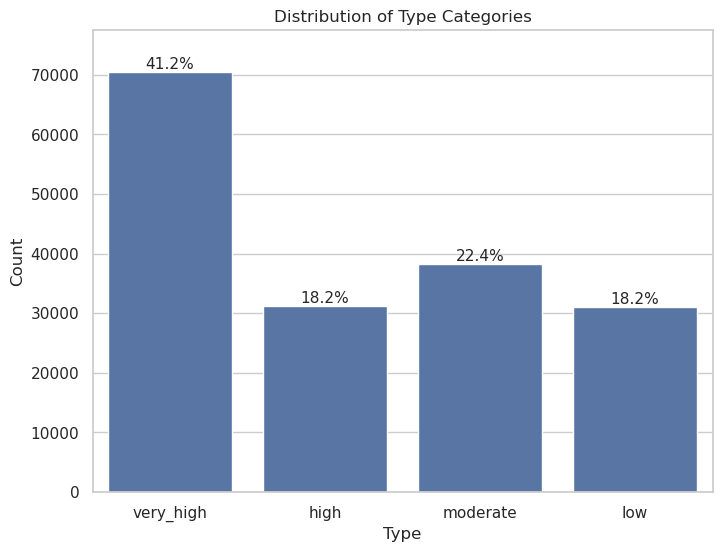

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Calculate counts and percentages
counts = promoter_like_openChromatin_chromHMM_GeneTPM_TxTPM['Type'].value_counts()
total = counts.sum()
percentages = (counts / total * 100).round(2)

# Desired order
type_order = ['very_high', 'high', 'moderate', 'low']

# Plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=promoter_like_openChromatin_chromHMM_GeneTPM_TxTPM, x='Type', order=type_order)

# Annotate each bar
for p in ax.patches:
    height = p.get_height()
    label = p.get_x() + p.get_width() / 2
    category = p.get_x() + p.get_width() / 2
    type_name = p.get_x() + p.get_width() / 2
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=11)

# Labels
plt.title('Distribution of Type Categories')
plt.xlabel('Type')
plt.ylabel('Count')
plt.ylim(0, counts.max() * 1.1)  # Add some space above bars

plt.show()


# add Hi-C data

In [202]:
!bedtools intersect -a /mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/OB/promoter_like_regions_OB_openchromatin_chromHMM_Expression_level.tsv -b /mnt/10T-backup-mingju/ifar/Hi-C/OB13/OB13_merge_hic.txt_sorted_lexicographical_addchr -wao > /mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/OB/promoter_like_regions_OB_openchromatin_chromHMM_Expression_Level_HiC.bed 

In [203]:
!perl ~/PreprocessDB/promoter_table/promoter_HiC_processing.pl /mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/OB/promoter_like_regions_OB_openchromatin_chromHMM_Expression_Level_HiC.bed

In [204]:
OB_promoter_table = pd.read_csv('/mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/OB/promoter_like_regions_OB_openchromatin_chromHMM_Expression_Level_HiC.bed_table.bed',sep='\t')

In [205]:
OB_promoter_table

,Chr,Start,End,Transcript,TSS,Gene,Strand,Transcript_support_level,OpenChromatin,ChromHMM,GeneTPM,TranscriptTPM,Type,Score,Score_source,HiC_Promoter_bin,HiC_Distal_bin,HiC_info
0,chr1,65169,65669,ENST00000641515,65419,OR4F5,+,0,NaN,chr1:10000:96080:25_Quies,0.00,0.00,low,0,NaN,1:64000:66000,1:62000:64000,"GOTHIC:readcount:11,qvalue:1.31e-34"
1,chr1,451428,451928,ENST00000426406,451678,OR4F29,-,0,NaN,chr1:348136:501536:25_Quies,0.51,0.51,low,1,TranscriptTPM>0(+1),NaN,NaN,NaN
2,chr1,686404,686904,ENST00000332831,686654,OR4F16,-,0,NaN,chr1:634820:733820:25_Quies,0.51,0.51,low,1,TranscriptTPM>0(+1),NaN,NaN,NaN
3,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5,ATAC-seq:chr1:923436-925275;DNase-seq:chr1:923...,chr1:923420:923820:2_PromU;chr1:923820:924820:...,4.02,0.08,very_high,6,OpenChromatin:ATAC+DNase(+3);ChromHMM:ActivePr...,1:922000:924000,1:884000:886000,"GOTHIC:readcount:11,qvalue:8.86e-24"
4,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5,ATAC-seq:chr1:923436-925275;DNase-seq:chr1:923...,chr1:923420:923820:2_PromU;chr1:923820:924820:...,4.02,0.08,very_high,6,OpenChromatin:ATAC+DNase(+3);ChromHMM:ActivePr...,1:922000:924000,1:906000:908000,"GOTHIC:readcount:12,qvalue:5.22e-29"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5756007,chrY,57209637,57210137,ENST00000711283,57209887,WASH6P,+,2,NaN,NaN,10.27,0.00,moderate,2,GeneTPM>1(+1);TSL1-2(+1),NaN,NaN,NaN
5756008,chrY,57210094,57210594,ENST00000711284,57210344,WASH6P,+,1,NaN,NaN,10.27,4.76,moderate,3,TranscriptTPM>1(+2);TSL1-2(+1),NaN,NaN,NaN
5756009,chrY,57210094,57210594,ENST00000711284,57210344,WASH6P,+,1,NaN,NaN,10.27,4.76,moderate,3,TranscriptTPM>1(+2);TSL1-2(+1),NaN,NaN,NaN
5756010,chrY,57210341,57210841,ENST00000711285,57210591,WASH6P,+,2,NaN,NaN,10.27,0.00,moderate,2,GeneTPM>1(+1);TSL1-2(+1),NaN,NaN,NaN


In [206]:
OB_promoter_table[OB_promoter_table['HiC_Distal_bin'] == '1:3066000:3068000']

,Chr,Start,End,Transcript,TSS,Gene,Strand,Transcript_support_level,OpenChromatin,ChromHMM,GeneTPM,TranscriptTPM,Type,Score,Score_source,HiC_Promoter_bin,HiC_Distal_bin,HiC_info
12579,chr1,3068918,3069418,ENST00000511072,3069168,PRDM16,+,5,ATAC-seq:chr1:3068698-3070900;DNase-seq:chr1:3...,chr1:3068636:3069236:2_PromU;chr1:3069236:3069...,6.8,0.00,very_high,6,OpenChromatin:ATAC+DNase(+3);ChromHMM:ActivePr...,1:3068000:3070000,1:3066000:3068000,"GOTHIC:readcount:42,qvalue:3.55e-128"
12595,chr1,3068933,3069433,ENST00000607632,3069183,PRDM16,+,2,ATAC-seq:chr1:3068698-3070900;DNase-seq:chr1:3...,chr1:3068636:3069236:2_PromU;chr1:3069236:3069...,6.8,2.47,very_high,8,OpenChromatin:ATAC+DNase(+3);ChromHMM:ActivePr...,1:3068000:3070000,1:3066000:3068000,"GOTHIC:readcount:42,qvalue:3.55e-128"
12611,chr1,3068947,3069447,ENST00000378391,3069197,PRDM16,+,1,ATAC-seq:chr1:3068698-3070900;DNase-seq:chr1:3...,chr1:3068636:3069236:2_PromU;chr1:3069236:3069...,6.8,0.00,very_high,7,OpenChromatin:ATAC+DNase(+3);ChromHMM:ActivePr...,1:3068000:3070000,1:3066000:3068000,"GOTHIC:readcount:42,qvalue:3.55e-128"
12627,chr1,3068953,3069453,ENST00000270722,3069203,PRDM16,+,1,ATAC-seq:chr1:3068698-3070900;DNase-seq:chr1:3...,chr1:3068636:3069236:2_PromU;chr1:3069236:3069...,6.8,3.38,very_high,8,OpenChromatin:ATAC+DNase(+3);ChromHMM:ActivePr...,1:3068000:3070000,1:3066000:3068000,"GOTHIC:readcount:42,qvalue:3.55e-128"
12643,chr1,3068961,3069461,ENST00000514189,3069211,PRDM16,+,5,ATAC-seq:chr1:3068698-3070900;DNase-seq:chr1:3...,chr1:3068636:3069236:2_PromU;chr1:3069236:3069...,6.8,0.00,very_high,6,OpenChromatin:ATAC+DNase(+3);ChromHMM:ActivePr...,1:3068000:3070000,1:3066000:3068000,"GOTHIC:readcount:42,qvalue:3.55e-128"
